In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import openpathsampling as paths

from openpathsampling.analysis.tis_analysis import TISTransition

storage = paths.storage.Storage("toy_tis.nc")
print len(storage.sample)

12482


In [2]:
print len(storage.sampleset)

10001


In [3]:
print storage.sampleset[0].samples

[<Sample @ 0x10b7a2e10>, <Sample @ 0x10b78af90>, <Sample @ 0x10b7ad3d0>, <Sample @ 0x10b7b4e90>, <Sample @ 0x10b934390>, <Sample @ 0x10b93a910>, <Sample @ 0x10be43dd0>]


In [4]:
ensembles = [[s.ensemble for s in storage.sampleset[0] if s.replica==r][0] for r in range(-1, len(storage.ensemble)-2)]

In [5]:
ensembles

In [29]:
stateA = ensembles[1].ensembles[2].ensemble.volume.volume1
stateB = ensembles[1].ensembles[2].ensemble.volume.volume2
interfaces = [e.ensembles[1].ensemble2.volume for e in ensembles[1:]]
op = ensembles[1].ensembles[0].ensemble.volume.orderparameter

In [30]:
ensembles[1]

In [31]:
ensembles[1].ensembles[0]

In [32]:
lmax = [e.ensembles[1].ensemble2.volume.lambda_max for e in ensembles[1:]]
print lmax

[-0.3, -0.25, -0.2, -0.13, -0.05, 0.0]


In [33]:
storage.variables['sample_ensemble_idx'][:]
tt = storage.variables['trajectory_snapshot_idx']
all_lengths =  [len(storage.variables['trajectory_snapshot_idx'][nn]) for nn in range(len(storage.trajectory))]

In [34]:
%%time
tis = TISTransition(stateA=stateA, stateB=stateB, orderparameter=op, interfaces=interfaces, storage=storage)

CPU times: user 466 µs, sys: 292 µs, total: 758 µs
Wall time: 492 µs


In [35]:
tis.ensembles = ensembles[1:]

In [38]:
atraj = storage.sample[1].trajectory
print op
for frame in atraj:
    print op(frame)

{ 'memory' : {}, 'storages' : {Storage @ 'toy_tis.nc': {1: -0.30900707840919495, 2: -0.29997217655181885, 3: -0.2919054627418518, 4: -0.28667595982551575, 5: -0.28310254216194153, 6: -0.2790337800979614, 7: -0.27488887310028076, 8: -0.2712900936603546, 9: -0.26824426651000977, 10: -0.26515650749206543, 11: -0.2622058689594269, 12: -0.25929906964302063, 13: -0.25496354699134827, 14: -0.250869482755661, 15: -0.2480626255273819, 16: -0.24615953862667084, 17: -0.24484360218048096, 18: -0.24319523572921753, 19: -0.24150127172470093, 20: -0.2405487298965454, 21: -0.2405519038438797, 22: -0.24079486727714539, 23: -0.24039997160434723, 24: -0.24012860655784607, 25: -0.23979926109313965, 26: -0.23759838938713074, 27: -0.23438392579555511, 28: -0.23245397210121155, 29: -0.23231886327266693, 30: -0.2324991226196289, 31: -0.23311421275138855, 32: -0.2342763990163803, 33: -0.23541094362735748, 34: -0.23833614587783813, 35: -0.2433549016714096, 36: -0.24859890341758728, 37: -0.25480347871780396, 38:

TypeError: 'NoneType' object is not callable

In [ ]:
%%time
tis.all_statistics(samples=storage.sample, weights=None, force=True)

In [ ]:
print tis.histograms

In [13]:
# for sample_set[ssetid], if exists sample in `ensemble`, return list of op(sample.trajectory)
#storage.query_orderparameter_trajectory(orderparameter, ensemble=None, replica=None, step=None, trial=False) #

In [14]:
%%time
tis.ensemble_statistics(ensemble=ensembles[1], samples=storage.sample, weights=None, force=True)

CPU times: user 1.66 s, sys: 129 ms, total: 1.79 s
Wall time: 1.71 s


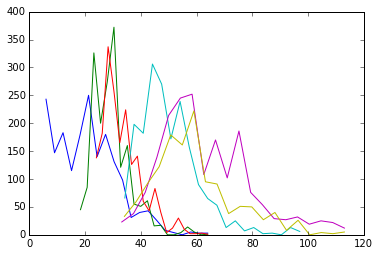

In [26]:
for ens in ensembles[1:]:
    myhist = tis.histograms['pathlength'][ens]
    plt.plot(myhist.plot_bins(), myhist.histogram())